# Worksheet 16

Name: Manushi Munshi

UID: U25855816

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [6]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = 0.1  # Adjusted the learning rate
expanding_rate = 0.99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array([1 if label == 0 else -1 for label in labels])

alpha_i = np.zeros((len(X),))
b = 0

def snap(alpha_i, b):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    meshData = np.c_[xx.ravel(), yy.ravel()]
    
    cs = ['r' if predict(alpha_i, b, point) > 0 else 'b' for point in X]
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], color=cs, s=50, alpha=0.8)
    
    Z = np.array([predict(alpha_i, b, point) for point in meshData])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict(alpha_i, b, x):
    wx = 0
    for j in range(len(X)):
        wx += alpha_i[j] * np.dot(X[j], x)
    return wx + b

images = []
for _ in range(epochs):
    for i in range(len(X)):
        x, y = X[i], Y[i]
        ypred = predict(alpha_i, b, x)
        
        if y * ypred <= 0:
            alpha_i[i] += y * learning_rate
            b += y * learning_rate

    images.append(snap(alpha_i, b))

images[0].save(
    'perceptron.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [ ]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = 0.1
expanding_rate = 0.99
retracting_rate = 1.1
c = 1  # Polynomial kernel parameter
n = 2  # Polynomial kernel parameter

X, labels = datasets.make_moons(n_samples=100, noise=0.3, random_state=0)
Y = np.array([1 if label == 0 else -1 for label in labels])

alpha_i = np.zeros((len(X),))
b = 0

# Define a polynomial kernel function
def polynomial(x_i, x_j):
    return (np.dot(x_i, x_j) + c) ** n

def snap(alpha_i, b):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    meshData = np.c_[xx.ravel(), yy.ravel()]

    cs = ['r' if predict(alpha_i, b, point) > 0 else 'b' for point in X]
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], color=cs, s=50, alpha=0.8)

    Z = np.array([predict(alpha_i, b, point) for point in meshData])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict(alpha_i, b, x):
    wx = 0
    for j in range(len(X)):
        wx += alpha_i[j] * Y[j] * polynomial(X[j], x)
    return wx + b

images = []
for _ in range(epochs):
    for i in range(len(X)):
        x, y = X[i], Y[i]
        ypred = predict(alpha_i, b, x)

        if y * ypred <= 0:
            alpha_i[i] += y * learning_rate
            b += y * learning_rate

    images.append(snap(alpha_i, b))

images[0].save(
    'perceptron1.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

- Decrease value of n to ensure less complex decision boundaries
- Do cross validation to get optimal n value.
- Tune the regularization parameter c with n in SVM library. 

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

- Increase sigma value to make kernel wider and capture more patterns.
- Do cross validation to find optimal parameter. 

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

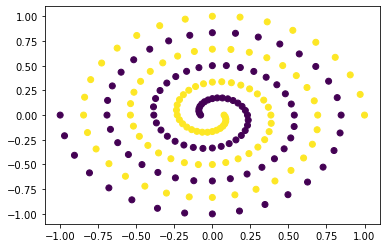

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

plt.scatter(x[:,0], x[:,1], c=y)

Accuracy: 0.4358974358974359


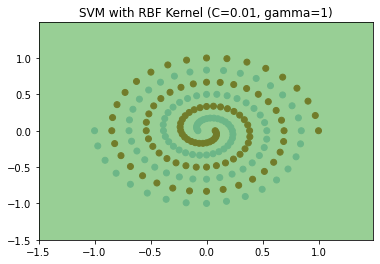

In [10]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

TEMPFILE = "temp.png"

# Load the dataset from the given file
data = np.loadtxt("spiral.data")
X, y = data[:, :2], data[:, 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an SVM classifier with an RBF kernel
svm = SVC(kernel='rbf', C=0.01, gamma=1)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualization
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

Z = svm.predict(meshData)
Z = Z.reshape(xx.shape)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
plt.title(f"SVM with RBF Kernel (C={svm.C}, gamma={svm.gamma})")
plt.show()